# Homework 02 --- Session 3, Multilinear regression

In [1]:
import numpy as np   # basic numeric module in python, for array and matrix computation
import pandas as pd  # advanced numeric module, excels in data frame analysis
import matplotlib.pyplot as plt  # for data visualization
%pylab inline
# so the plots are embedded in notebook rather than a stand alone window

from mpl_toolkits.mplot3d import Axes3D  # for 3D plot
import statsmodels.formula.api as smf    # for OLS regression

Populating the interactive namespace from numpy and matplotlib


## EX 1 Artificial data (25pt -- 5+5+5+10)
### Dataset 'H31.csv'
### Tasks:
Consider a multivariate regression of the output variable $y$ over the 3 regressors $x_1$, $x_2$, $x_3$ as follows.
* (a) Which one of the regressors serves as dummy variable corresponding to an intercept term?
    * Ignore the first column since it's just a duplicate index (You can avoid it by running **ex1 = pd.read_csv('H31.csv', index_col=0)** )
* (b) Calculate the coefficients $\hat w$ manually or with python *numpy* module by using matrix computation.
* (c) Verify your answer by implementing the OLS regression function with python *statsmodels* module.
* (d) Visualize the data points and your fitted model in a 3D plot, like we did in the lab session.

In [4]:
ex1 = pd.read_csv('data/H31.csv',index_col=0)

In [5]:
ex1.head()

,y,x1,x2,x3
1,0,1,-2,1
2,2,-1,-1,1
3,2,0,0,1
4,3,-1,1,1
5,3,1,2,1


**(a) Which one of the regressors serves as dummy variable corresponding to an intercept term?**

**x3** is the regressor corresponding to an intercept term.

**(b) Calculate the coefficients ŵ manually or with python numpy module by using matrix computation.**

In [12]:
X = np.matrix(ex1.loc[:,['x1','x2','x3']])
Y = np.matrix(ex1.y).T
w = (X.T * X).I * X.T * Y
print(w)

[[-0.5]
 [ 0.7]
 [ 2. ]]


**(c) Verify your answer by implementing the OLS regression function with python statsmodels module.**

In [13]:
lm1 = smf.ols(formula = 'y ~ x1 + x2', data = ex1).fit()
print('R2 = %f'%lm1.rsquared)
print(lm1.params)

R2 = 0.983333
Intercept    2.0
x1          -0.5
x2           0.7
dtype: float64


**(d) Visualize the data points and your fitted model in a 3D plot, like we did in the lab session.**

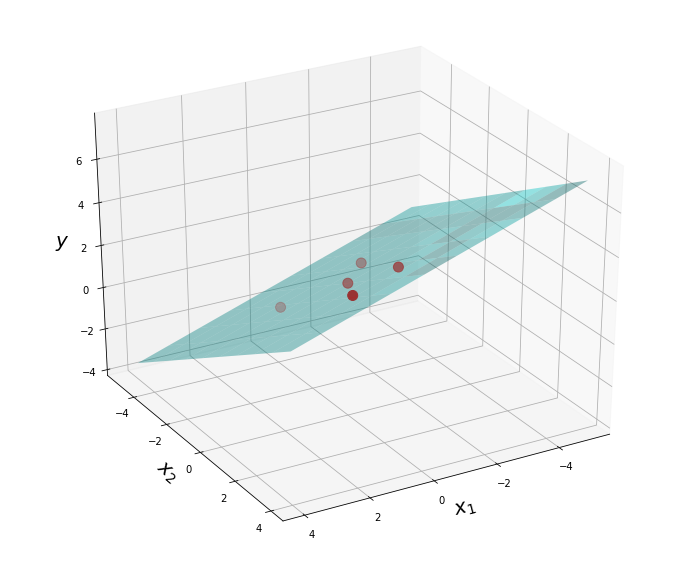

In [14]:
fig = plt.figure(figsize = (12,10))  # Create a plot with customized figure size (width, height)
ax = fig.gca(projection='3d')  # Extract the axis for further operations
ax.scatter(ex1.x1, ex1.x2, ex1.y, s = 100,  c = 'r')
# Scatter plot, "c" stands for color, and "s" determines the marker size

# Generate coordinates for hyperplane
radius = 5
x1, x2 = np.meshgrid(range(-radius,radius), range(-radius,radius))
fit_y = lm1.params[0] + lm1.params[1] * x1 + lm1.params[2] * x2

# alpha (between 0 and 1) controls the transparency with 0 being totally transparent
ax.plot_surface(x1, x2, fit_y, color='c', alpha = 0.4)
# Set labels and fontsize
ax.set_xlabel('$x_1$', fontsize = 20)
ax.set_ylabel('$x_2$', fontsize = 20)
ax.set_zlabel('$y$', fontsize = 20)

ax.view_init(azim = 60)   # Controls the viewing angle

## EX 2, Income vs Insurance coverage (35+10pt -- 10+10+5+10+10)
### Dataset 'IncomeInsReg.csv'
You are given the demographic data of insurance coverage in NYC, with the details:
* Zip code
* Per capita income
* Total population (for each zip code)
* Population with Insurance coverage
    * Population with Public Insurance coverage
    * Population with Private Insurance coverage
* Population with No Insurance coverage

### Tasks:
* (a) Verify that there are some people with BOTH public insurance and private insurance according to this data set, then create a new column containing such information
* (b) Modify the old data frame, or simply create a new one, such that this data frame contains (including but not limited to) the following information in each zipcode area:
    * IncomePerCapita
    * Total Population
    * Population with Public Insurance coverage ONLY
    * Population with Private Insurance coverage ONLY
    * Population with NO Insurance coverage
    * Population with BOTH types of Insurance coverage
* (c) Drop rows with NaN (if any) and convert all population counts into proportions (percentage of total population, with the form 58.3 instead of 0.583)
* (d) Regress over these proportions (the ones mentioned in part b, leave out "No Insurance Coverage") to predict income -- What interesting results do we have here? Briefly state what you've obtained.
#### Extra credit:
* (e) Visualize the observed income versus the predicted income, like what we did in the lab session. Does this fitted line look great or not? If you're not sure, check the correlation matrix and make a guess.

In [42]:
ex2 = pd.read_csv('data/IncomeInsReg.csv')

In [43]:
ex2.head()

,Zipcode,IncomePerCapita,TotalPop,WithCoverage,Public,Private,NoCoverage
0,10001,77512.0,22767,20809,5800,16795,1958
1,10002,26905.0,79490,70361,40139,35167,9129
2,10003,79088.0,56909,53135,8593,48522,3774
3,10004,98020.0,3024,2780,180,2705,244
4,10005,99633.0,7566,6996,122,6944,570


**(a) Verify that there are some people with BOTH public insurance and private insurance according to this data set, then create a new column containing such information**

In [44]:
ex2['BothCoverage'] = ex2['Public'] + ex2['Private'] - (ex2['TotalPop'] - ex2['NoCoverage'])
ex2.head()

,Zipcode,IncomePerCapita,TotalPop,WithCoverage,Public,Private,NoCoverage,BothCoverage
0,10001,77512.0,22767,20809,5800,16795,1958,1786
1,10002,26905.0,79490,70361,40139,35167,9129,4945
2,10003,79088.0,56909,53135,8593,48522,3774,3980
3,10004,98020.0,3024,2780,180,2705,244,105
4,10005,99633.0,7566,6996,122,6944,570,70


**(b) Modify the old data frame, or simply create a new one, such that this data frame contains (including but not limited to) the following information in each zipcode area:**
    * IncomePerCapita
    * Total Population
    * Population with Public Insurance coverage ONLY
    * Population with Private Insurance coverage ONLY
    * Population with NO Insurance coverage
    * Population with BOTH types of Insurance coverage

In [45]:
ex2['PublicOnly'] = ex2['Public'] - ex2['BothCoverage']
ex2['PrivateOnly'] = ex2['Private'] - ex2['BothCoverage']
ex2.head()

,Zipcode,IncomePerCapita,TotalPop,WithCoverage,Public,Private,NoCoverage,BothCoverage,PublicOnly,PrivateOnly
0,10001,77512.0,22767,20809,5800,16795,1958,1786,4014,15009
1,10002,26905.0,79490,70361,40139,35167,9129,4945,35194,30222
2,10003,79088.0,56909,53135,8593,48522,3774,3980,4613,44542
3,10004,98020.0,3024,2780,180,2705,244,105,75,2600
4,10005,99633.0,7566,6996,122,6944,570,70,52,6874


**(c) Drop rows with NaN (if any) and convert all population counts into proportions (percentage of total population, with the form 58.3 instead of 0.583)**

In [46]:
ex2 = ex2.dropna(axis=0,how='any')

In [47]:
convert = lambda feature: 100 * feature / ex2['TotalPop']

In [49]:
for column in ex2.iloc[:,3:]:
    ex2[column] = convert(ex2[column])

#ex2.head()

,Zipcode,IncomePerCapita,TotalPop,WithCoverage,Public,Private,NoCoverage,BothCoverage,PublicOnly,PrivateOnly,a
0,10001,77512.0,22767,91.399833,25.475469,73.769052,8.600167,7.844687,17.630781,65.924364,0.401458
1,10002,26905.0,79490,88.515537,50.495660,44.240785,11.484463,6.220908,44.274752,38.019877,0.111354
2,10003,79088.0,56909,93.368360,15.099545,85.262437,6.631640,6.993621,8.105923,78.268815,0.164066
3,10004,98020.0,3024,91.931217,5.952381,89.451058,8.068783,3.472222,2.480159,85.978836,3.040053
4,10005,99633.0,7566,92.466297,1.612477,91.779011,7.533703,0.925192,0.687285,90.853820,1.222129


**(d) Regress over these proportions (the ones mentioned in part b, leave out "No Insurance Coverage") to predict income -- What interesting results do we have here? Briefly state what you've obtained.**

In [58]:
lm2=smf.ols(formula='IncomePerCapita~WithCoverage+Public+Private+BothCoverage+PublicOnly+PrivateOnly',data=ex2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        IncomePerCapita   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     97.17
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           3.25e-37
Time:                        19:18:25   Log-Likelihood:                -2033.2
No. Observations:                 181   AIC:                             4074.
Df Residuals:                     177   BIC:                             4087.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -6.303e+04   2.76e+04     -2.280      0.024   -1.18e+05   -8485.237
WithCoverage   501.8200    166.729      3.010      0.003     172.787     830.853
Public         -81.1575    102.769     -0.790      0.431    -283.968     121.653
Private        536.7057     76.822      6.986      0.000     385.102     688.310
BothCoverage   -46.2717    140.421     -0.330      0.742    -323.386     230.843
PublicOnly     -34.8858    145.151     -0.240      0.810    -321.335     251.564
PrivateOnly    582.9775    115.304      5.056      0.000     355.430     810.525
==============================================================================
Omnibus:                       46.950   Durbin-Watson:                   1.164
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.094
Skew:                           1.213   Prob(JB):                     3.70e-21
Kurtosis:                       5.567   Cond. No.                     4.24e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.64e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [59]:
lm2.params

Intercept      -63030.644620
WithCoverage      501.819952
Public            -81.157510
Private           536.705725
BothCoverage      -46.271737
PublicOnly        -34.885773
PrivateOnly       582.977462
dtype: float64

In [60]:
predictIncome = lm2.params.Intercept + lm2.params.WithCoverage * ex2.WithCoverage\
    +lm2.params.Public * ex2.Public + +lm2.params.Private * ex2.Private\
    +lm2.params.BothCoverage * ex2.BothCoverage \
    +lm2.params.PublicOnly * ex2.PublicOnly + lm2.params.PrivateOnly * ex2.PrivateOnly

In [61]:
R2 = 1 - sum((ex2.IncomePerCapita - predictIncome)**2) / sum((ex2.IncomePerCapita - mean(ex2.IncomePerCapita))**2)
R2

0.62221456398251829

***what you've obtained.***

**Extra credit:
(e) Visualize the observed income versus the predicted income, like what we did in the lab session. Does this fitted line look great or not? If you're not sure, check the correlation matrix and make a guess.**

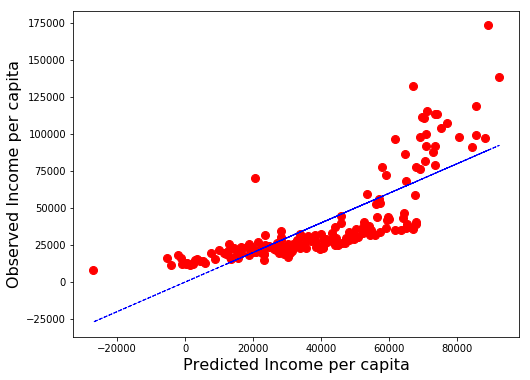

In [74]:
y_fit = lm2.predict(ex2)   # Calculate the predicted value
plt.figure(figsize = (8,6))
plt.plot(y_fit,ex2.IncomePerCapita,'or', markersize = 8) # Plot the observed value, linestyle = 'or', red dots
plt.plot(y_fit,y_fit,'--b', linewidth = 1)                 # Plot the predicted value, blue dashed line

# Plot setting
plt.xlabel('Predicted Income per capita', fontsize = 16)
plt.ylabel('Observed Income per capita', fontsize = 16)

In [75]:
ex2.corr()

,Zipcode,IncomePerCapita,TotalPop,WithCoverage,Public,Private,NoCoverage,BothCoverage,PublicOnly,PrivateOnly
Zipcode,1.000000,-0.490675,0.115875,-0.334912,0.232870,-0.279087,0.334912,0.032335,0.219494,-0.299357
IncomePerCapita,-0.490675,1.000000,-0.374920,0.602753,-0.713251,0.779469,-0.602753,0.101578,-0.746417,0.778040
TotalPop,0.115875,-0.374920,1.000000,-0.381392,0.379426,-0.470548,0.381392,-0.179863,0.443568,-0.433830
WithCoverage,-0.334912,0.602753,-0.381392,1.000000,-0.431746,0.755231,-1.000000,0.344447,-0.556389,0.679430
Public,0.232870,-0.713251,0.379426,-0.431746,1.000000,-0.871228,0.431746,0.169275,0.931315,-0.955171
Private,-0.279087,0.779469,-0.470548,0.755231,-0.871228,1.000000,-0.755231,0.267759,-0.964837,0.956594
NoCoverage,0.334912,-0.602753,0.381392,-1.000000,0.431746,-0.755231,1.000000,-0.344447,0.556389,-0.679430
BothCoverage,0.032335,0.101578,-0.179863,0.344447,0.169275,0.267759,-0.344447,1.000000,-0.201309,-0.024644
PublicOnly,0.219494,-0.746417,0.443568,-0.556389,0.931315,-0.964837,0.556389,-0.201309,1.000000,-0.940209
PrivateOnly,-0.299357,0.778040,-0.433830,0.679430,-0.955171,0.956594,-0.679430,-0.024644,-0.940209,1.000000


## EX 3, Polynomial fit (40+30pt -- 4+5+3$\times$4+5+3$\times$3+5+30)

### Try to fit y with a polynomial $$\hat y(x,w) = \sum\limits_{i=1}^M w_i\cdot x^i$$ with the given dataset 'H33.csv'

### Tasks:
* (a) Draw the scatter plot of x and y, guess what polynomial could be the best choice. (The name "x1" denotes $x^1$.)
* (b) Create new columns in data frame to contain the information of $x^2, x^3, x^4$
* (c) Try to fit y with polynomial of x with order 1, 2, 3, 4, respectively
    * For each model, store your fitted parameters as well as your $R^2$
* (d) Report the $R^2$, plot it and observe how it changes
* (e) Create a figure with four (4) subfigures, one for each polynomial degree M = 1, 2, 3, 4. In each subfigure:
    * (e.1) Draw the original scatter plot of x1 and y
    * (e.2) Plot the curve of true function $f(x) = 9x^2 - x + 1$
    * (e.3) Plot your fitted curve of degree M, observe how our model fits the data as M increases
* (f) Based on the plot, which model(s) fits the true curve best? Then provide the best coefficients $\hat w$
### Extra credit
* (g) In each subfigure:
    * (g.1) Pick an x value (at your discretion) $x_0$, then locate the y value both on your fitted curve and on our function curve ($f(x_0)$)
    * (g.2) Mark these two points with a small diamond, then draw a dashed line connecting them, showing "prediction error"
    * (g.3) Repeat g.1 and g.2 up to ten times (i.e. select up to ten random different future points and predict their values, compare your prediction with the true value), then:
        * Compute the average sum of squares of errors $E = \frac{\sum_i^n (y_i - f(x_i))^2}{n}$ ($x_i$ denotes your future points), mention it in your subfigure's title (**Be sure to use the SAME future points for ALL 4 models when you calculate prediction error**)
        * Which model has the smallest average error $E$? Does this fitted polynomial coincides with the M you picked in part f?

In [63]:
ex3 = pd.read_csv('data/H33.csv')
ex3.head()

,y,x1
0,2.613388,-0.50
1,2.170351,-0.32
2,0.049546,-0.14
3,1.158258,0.04
4,1.397567,0.22


**(a) Draw the scatter plot of x and y, guess what polynomial could be the best choice.**

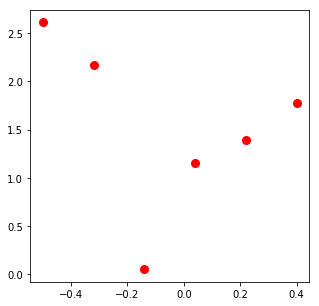

In [64]:
plt.figure(figsize = (5,5))
plt.plot(ex3.x1, ex3.y, 'ro', markersize = 8)

**(b) Create new columns in data frame to contain the information of  x2,x3,x4**

In [65]:
for i in range(1,4):
    ex3['x%d'%(i+1)] = ex3.x1**(i+1)

In [66]:
ex3.head()

,y,x1,x2,x3,x4
0,2.613388,-0.50,0.2500,-0.125000,0.062500
1,2.170351,-0.32,0.1024,-0.032768,0.010486
2,0.049546,-0.14,0.0196,-0.002744,0.000384
3,1.158258,0.04,0.0016,0.000064,0.000003
4,1.397567,0.22,0.0484,0.010648,0.002343


**(c) Try to fit y with polynomial of x with order 1, 2, 3, 4, respectively**

For each model, store your fitted parameters as well as your  R2

In [67]:
def MultiReg(data, degree):
    # First create a string for controlling the number of x_i
    string = ''
    for i in range(degree):
        string += str(i+1)  # For example, if degree == 3, then this string would be '123' at the end
    formula = 'y ~ x' + ' + x'.join(string) # join function will convert '123' to '1 + x2 + x3'

    # Perform regression and return the results
    lm = smf.ols(formula = formula, data = data).fit()
    return lm.rsquared, lm.params


# Run the function and store the results separately
R2 = []; Params = []
for M in range(1,5):
    a,b = MultiReg(ex3,M)  # For each M, run the function
    R2.append(a)
    Params.append(b)

In [68]:
print(R2)
print(Params)

[0.10479617162381571, 0.65125881311682754, 0.66574886312199211, 0.80198630229302015]
[Intercept    1.484119
x1          -0.858791
dtype: float64, Intercept    0.797871
x1          -0.112869
x2           7.459218
dtype: float64, Intercept    0.839133
x1           0.686771
x2           6.690924
x3          -5.121962
dtype: float64, Intercept     0.469719
x1            2.350384
x2           22.552763
x3          -20.607719
x4          -77.428785
dtype: float64]


**(d) Report the  R2 , plot it and observe how it changes**

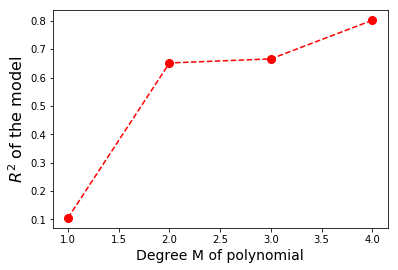

In [69]:
plt.plot(range(1,5),R2,'ro--', markersize = 8)
plt.xlabel('Degree M of polynomial', fontsize = 14)
plt.ylabel('$R^2$ of the model', fontsize = 16)
plt.show()

**(e) Create a figure with four (4) subfigures, one for each polynomial degree M = 1, 2, 3, 4. In each subfigure:**
    * (e.1) Draw the original scatter plot of x1 and y
    * (e.2) Plot the curve of true function f(x)=9x^2−x+1
    * (e.3) Plot your fitted curve of degree M, observe how our model fits the data as M increases

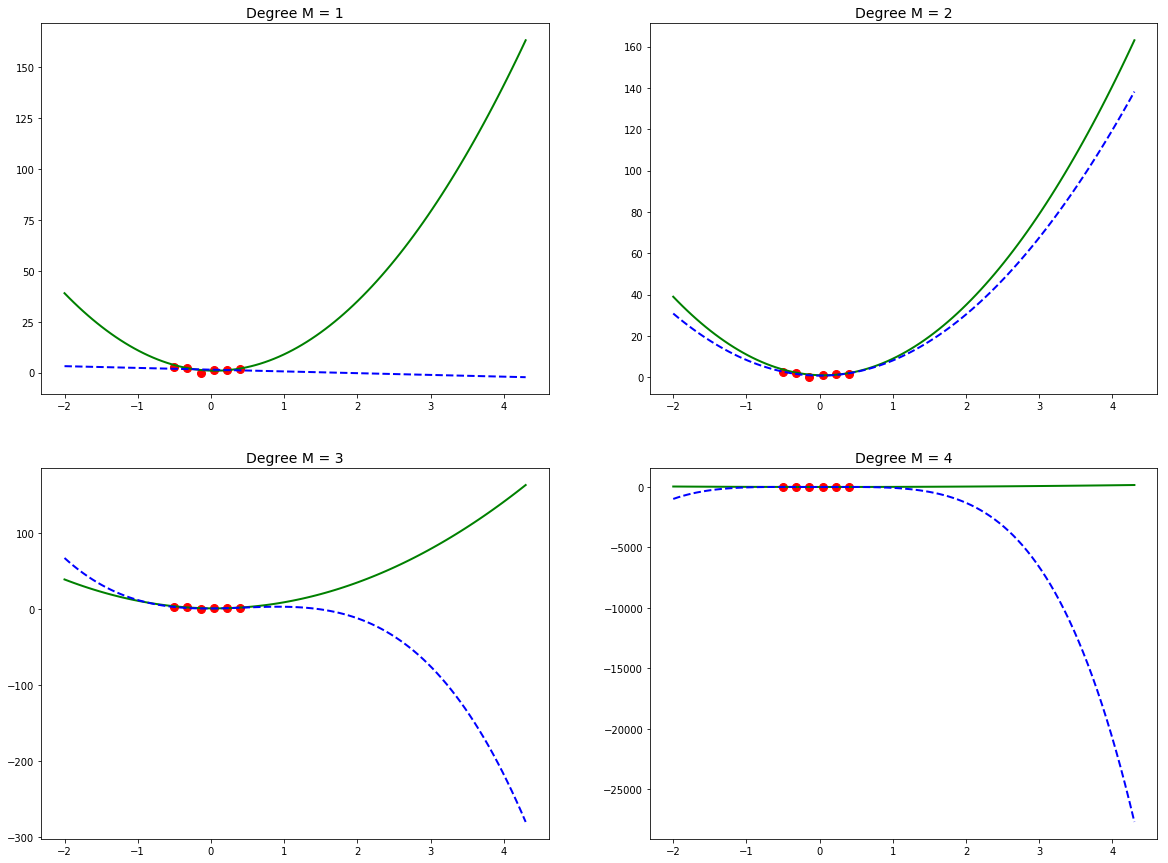

In [78]:
plt.figure(figsize = (20,15))

f = lambda x: 9*x**2 - x + 1

for M in range(1,5):
    plt.subplot(220+M)   # Plot subfigure, M controls the location
    x_fit = np.linspace(-2,4.3,100)  # For smoothing the fitted curve
    y_fit = pd.DataFrame(np.matrix([x_fit**k for k in range(M+1)]).T,  # Generate our fitted curve
                         columns = Params[M-1].index).mul(Params[M-1], 1).sum(1)  # 1 means computation runs row-wise
    # Pay attention how we obtain the results by controlling the axes on which the operations are performed

    plt.plot(ex3.x1, ex3.y, 'ro', markersize = 8)    # Red dots, the observations
    plt.plot(x_fit, f(x_fit), 'g-', lw = 2)              # Green curve, the actual function f defined before
    plt.plot(x_fit, y_fit, 'b--', lw = 2)                # Blue dashed line, our fitted curve
    plt.title('Degree M = %d'%(M), fontsize = 14)

**(f) Based on the plot, which model(s) fits the true curve best? Then provide the best coefficients  ŵ **

#### When Degree M = 2, the model fits the true curve best.

In [73]:

print('The best coefficients ŵ: x1 = {}, x2 = {}, x3(Intercept) = {}'.format(Params[1]['x1'],Params[1]['x2'],Params[1]['Intercept']))

The best coefficients ŵ: x1 = -0.112869495738, x2 = 7.4592179007, x3(Intercept) = 0.797870687691


### Extra credit
**(g) In each subfigure:**

(g.1) Pick an x value (at your discretion)  x0x0 , then locate the y value both on your fitted curve and on our function curve ( f(x0)f(x0) )

(g.2) Mark these two points with a small diamond, then draw a dashed line connecting them, showing "prediction error"

(g.3) Repeat g.1 and g.2 up to ten times (i.e. select up to ten random different future points and predict their values, compare your prediction with the true value), then:

Compute the average sum of squares of errors  E=∑ni(yi−f(xi))2n  ( xixi  denotes your future points), mention it in your subfigure's title (Be sure to use the SAME future points for ALL 4 models when you calculate prediction error)

Which model has the smallest average error  EE ? Does this fitted polynomial coincides with the M you picked in part f?

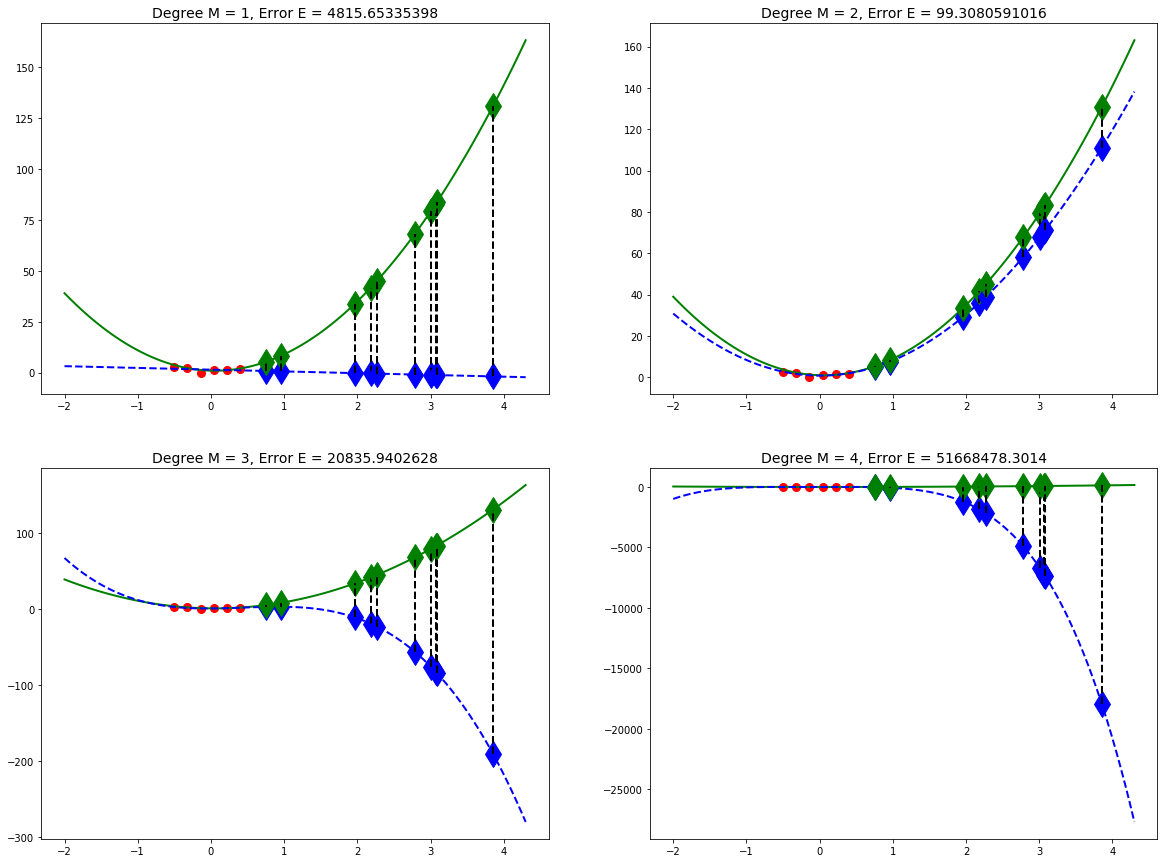

In [85]:
plt.figure(figsize = (20,15))

f = lambda x: 9*x**2 - x + 1

for M in range(1,5):
    plt.subplot(220+M)   # Plot subfigure, M controls the location
    x_fit = np.linspace(-2,4.3,100)  # For smoothing the fitted curve
    y_fit = pd.DataFrame(np.matrix([x_fit**k for k in range(M+1)]).T,  # Generate our fitted curve
                         columns = Params[M-1].index).mul(Params[M-1], 1).sum(1)  # 1 means computation runs row-wise
    # Pay attention how we obtain the results by controlling the axes on which the operations are performed

    plt.plot(ex3.x1, ex3.y, 'ro', markersize = 8)    # Red dots, the observations
    plt.plot(x_fit, f(x_fit), 'g-', lw = 2)              # Green curve, the actual function f defined before
    plt.plot(x_fit, y_fit, 'b--', lw = 2)                # Blue dashed line, our fitted curve
    
    np.random.seed(88)
    y_future = np.zeros(10)
    x_future = 4.3 * np.random.rand(10)
    E = 0
    for n in range(len(y_future)):
        for i in range(len(Params[M-1])):
            y_future[n] += Params[M-1][i] * (x_future[n]**i)
        
        E = E + (y_future[n] - f(x_future[n])) ** 2
        plt.plot(x_future[n], y_future[n], 'bd', markersize = 18)        # Blue star, fitted value
        plt.plot(x_future[n], f(x_future[n]), 'gd', markersize = 18)     # Green star, true value
        plt.plot([x_future[n],x_future[n]], [y_future[n], f(x_future[n])], 'k--', lw = 2)
        
        
    plt.title('Degree M = {}, Error E = {}'.format(M,E/10), fontsize = 14)

**Which model has the smallest average error E ? **

Model 2 has the smallest average error E.

**Does this fitted polynomial coincides with the M you picked in part f?**

Yes, this polynomial coincides with the M = 2 I picked in part f.